In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

data = pd.read_csv('EU.csv')
print(data.head())


   Unnamed: 0     dateRep  day  month  year  cases  deaths  \
0         681  14/12/2020   14     12  2020    788      14   
1         683  13/12/2020   13     12  2020    879      12   
2         685  12/12/2020   12     12  2020    802      12   
3         687  11/12/2020   11     12  2020    873      14   
4         689  10/12/2020   10     12  2020    752      15   

  countriesAndTerritories countryterritoryCode  popData2019 continentExp  \
0                 Albania                  ALB      2862427       Europe   
1                 Albania                  ALB      2862427       Europe   
2                 Albania                  ALB      2862427       Europe   
3                 Albania                  ALB      2862427       Europe   
4                 Albania                  ALB      2862427       Europe   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                         380.970414           
1                                         

In [4]:
countries = data.drop_duplicates("countriesAndTerritories")

In [6]:
countries.head()

,Unnamed: 0,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,681,14/12/2020,14,12,2020,788,14,Albania,ALB,2862427,Europe,380.970414
281,1933,14/12/2020,14,12,2020,50,1,Andorra,AND,76177,Europe,821.770351
557,4653,14/12/2020,14,12,2020,357,17,Armenia,ARM,2957728,Europe,458.392388
898,6569,14/12/2020,14,12,2020,3005,45,Austria,AUT,8858775,Europe,472.458100
1248,7269,14/12/2020,14,12,2020,4451,39,Azerbaijan,AZE,10047719,Europe,574.050687


In [7]:
print(data.head())

   Unnamed: 0     dateRep  day  month  year  cases  deaths  \
0         681  14/12/2020   14     12  2020    788      14   
1         683  13/12/2020   13     12  2020    879      12   
2         685  12/12/2020   12     12  2020    802      12   
3         687  11/12/2020   11     12  2020    873      14   
4         689  10/12/2020   10     12  2020    752      15   

  countriesAndTerritories countryterritoryCode  popData2019 continentExp  \
0                 Albania                  ALB      2862427       Europe   
1                 Albania                  ALB      2862427       Europe   
2                 Albania                  ALB      2862427       Europe   
3                 Albania                  ALB      2862427       Europe   
4                 Albania                  ALB      2862427       Europe   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                         380.970414           
1                                         

In [8]:
highPop = countries.sort_values("popData2019",ascending=False).head(4)
#print(highPop)

In [9]:
highestPop = ["Russia","Germany","France"]

In [10]:
# gets days since start of pandemic
days = []
for i in range(len(countries)):
    currentCountry = countries.iloc[i,7]
    df = data[data["countriesAndTerritories"] == currentCountry]
    d = len(df)
    while d != 0:
        days.append(d)
        d -= 1

print(len(days))

data["NumOfDays"] = pd.DataFrame(days)

17372


In [11]:

# adds country life expectancy t
lifeEx = pd.read_csv('life_expectancy_years.csv')
lifeEx.head()

for col in lifeEx.columns:
    if col != "2020" and col!= "country":
        del lifeEx[col]
        
lifeCountry =  lifeEx.to_numpy()
l = []
for i in range(len(countries)):
    currentCountry = countries.iloc[i,7]
    if currentCountry in lifeCountry: 
        val = lifeEx[lifeEx["country"] == currentCountry]["2020"].values[0]
        d = data[data["countriesAndTerritories"] == currentCountry]
        for j in range(len(d)):
            l.append(val)
            
data["lifeEx"] = pd.DataFrame(l)

In [12]:
highPop.head()

,Unnamed: 0,dateRep,day,month,year,cases,deaths,countriesAndTerritories,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
13876,93839,14/12/2020,14,12,2020,28080,488,Russia,RUS,145872260,Europe,263.663564
5837,43761,14/12/2020,14,12,2020,16362,188,Germany,DEU,83019213,Europe,341.136696
16470,113899,14/12/2020,14,12,2020,29136,222,Turkey,TUR,82003882,Europe,499.220269
5140,40729,14/12/2020,14,12,2020,11533,150,France,FRA,67012883,Europe,236.326200


In [13]:
f = data[data["countriesAndTerritories"].isin(["Russia","Germany","France"])].copy()
f.head()

lifeClean = lifeEx[lifeEx["country"].isin(["Russia","Germany","France"])].copy()


lifeCountry =  lifeClean.to_numpy()
l = []
for i in range(len(countries)):
    currentCountry = countries.iloc[i,7]
    if currentCountry in lifeCountry: 
        val = lifeEx[lifeEx["country"] == currentCountry]["2020"].values[0]
        d = data[data["countriesAndTerritories"] == currentCountry]
        for j in range(len(d)):
            l.append(val)
            
data["lifeEx"] = pd.DataFrame(l)

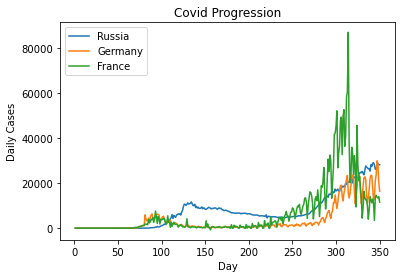

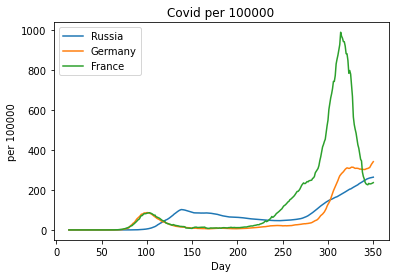

       Unnamed: 0     dateRep  day  month  year  cases  deaths  \
13876       93839  14/12/2020   14     12  2020  28080     488   
13877       93841  13/12/2020   13     12  2020  28137     560   
13878       93843  12/12/2020   12     12  2020  28585     613   
13879       93845  11/12/2020   11     12  2020  27927     562   
13880       93847  10/12/2020   10     12  2020  26190     559   

      countriesAndTerritories countryterritoryCode  popData2019 continentExp  \
13876                  Russia                  RUS    145872260       Europe   
13877                  Russia                  RUS    145872260       Europe   
13878                  Russia                  RUS    145872260       Europe   
13879                  Russia                  RUS    145872260       Europe   
13880                  Russia                  RUS    145872260       Europe   

       Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  NumOfDays  \
13876                                     

In [14]:


for i in highestPop:
    #currentCountry = highPop.iloc[i,7]
    df = data[data["countriesAndTerritories"] == i]
    #print(df.loc[df['cases'].idxmax()])
        
    plt.plot(df['NumOfDays'],df['cases'], label=i)
    #plt.plot(df['NumOfDays'],df["deaths"], label="Deaths")
    plt.title('Covid Progression')
    plt.xlabel('Day')
    plt.ylabel('Daily Cases')
    plt.legend()
plt.show()    

"""
for i in highestPop:
    #currentCountry = highPop.iloc[i,7]
    df = data[data["countriesAndTerritories"] == i]
    #print(df.loc[df['cases'].idxmax()])
        
    #plt.plot(df['NumOfDays'],df['cases'], label=currentCountry)
    plt.plot(df['NumOfDays'],df["deaths"], label=i)
    plt.title('Covid Deaths')
    plt.xlabel('Day')
    plt.ylabel('Daily Deaths')
    plt.legend()
plt.show()
"""

for i in highestPop:
    #currentCountry = highPop.iloc[i,7]
    df = data[data["countriesAndTerritories"] == i]
    #print(df.loc[df['cases'].idxmax()])
        
    #plt.plot(df['NumOfDays'],df['cases'], label=currentCountry)
    plt.plot(df['NumOfDays'],df["Cumulative_number_for_14_days_of_COVID-19_cases_per_100000"], label=i)
    plt.title('Covid per 100000')
    plt.xlabel('Day')
    plt.ylabel('per 100000')
    plt.legend()
plt.show()


x = []
for i in highestPop:
    df = data[data["countriesAndTerritories"] == i]
    print(df.head())
    




In [15]:
data.to_csv("D:\MastersStuff\CA682 - Data Visualisation and Management\EUcleaned2.csv")

In [ ]:
"""
from datetime import datetime
test = data[data["countriesAndTerritories"] == "Ireland"]
date_format = "%d/%m/%Y"


#dayone = datetime.strptime(firstday.values[0], date_format)
#last = datetime.strptime(lastday.values[0], date_format)


days = []
for i in range(len(highPop)):
    currentCountry = highPop.iloc[i,7]
    df = data[data["countriesAndTerritories"] == currentCountry]
    firstday = df.tail(1)["dateRep"] # first entry
    lastday = df.head(1)["dateRep"] # last entry
    
    
    dayone = datetime.strptime(firstday.values[0], date_format)
    last = datetime.strptime(lastday.values[0], date_format)
    
    numDays = last - dayone
    d = numDays.days
    while d != -1:
        days.append(d)
        d -= 1

print(len(days))
data["NumOfDays"] = pd.DataFrame(days)

https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/date.html
https://docs.google.com/document/d/1Ew5EMY8veJ41iJjsVwb7XqxkYRpvlhPLowjEBjMnX5k/edit
https://www.worldometers.info/coronavirus/country/ireland/

"""

In [ ]:
lifeEx.head()

In [ ]:
data.head()